In [1]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers,Sequential,losses,optimizers,datasets

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
tf.config.list_physical_devices('GPU')

[]

In [2]:
from keras.layers import add, ConvLSTM2D, Reshape, Dense, AveragePooling2D, Input, Conv2DTranspose, TimeDistributed, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.layers import add, Reshape, Dense, Input, TimeDistributed, Dropout, Activation, LSTM, Conv1D, Cropping1D,GRU
from keras.layers import MaxPooling1D, UpSampling1D, Cropping1D, SpatialDropout1D, Bidirectional, BatchNormalization 
from keras.models import Model, Sequential
import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras import metrics
from keras.optimizers import Adam
import matplotlib

In [3]:
import scipy.io as scio
import pandas as pd

#input
feature1 = r'\Train and Test\ACC_EW.mat'
data1 = scio.loadmat(feature1)
AA=data1['ACC_EW']
A=AA[:,0:300]

feature2 = r'\Train and Test\ACC_NS.mat'
data2 = scio.loadmat(feature2)
BB=data2['ACC_NS']
B=BB[:,0:300]

feature3 = r'\Train and Test\ACC_UD.mat'
data3 = scio.loadmat(feature3)
CC=data3['ACC_UD']
C=CC[:,0:300]

feature4 = r'\Train and Test\DIS_EW.mat'
data4 = scio.loadmat(feature4)
DD=data4['DIS_EW']
D=DD[:,0:300]

feature5 = r'\Train and Test\DIS_NS.mat'
data5 = scio.loadmat(feature5)
EE=data5['DIS_NS']
E=EE[:,0:300]

feature6 = r'\Train and Test\DIS_UD.mat'
data6 = scio.loadmat(feature6)
FF=data6['DIS_UD']
F=FF[:,0:300]

feature7 = r'\Train and Test\VEL_EW.mat'
data7 = scio.loadmat(feature7)
GG=data7['VEL_EW']
G=GG[:,0:300]

feature8 = r'\Train and Test\VEL_NS.mat'
data8 = scio.loadmat(feature8)
HH=data8['VEL_NS']
H=HH[:,0:300]

feature9 = r'\Train and Test\VEL_UD.mat'
data9 = scio.loadmat(feature9)
II=data9['VEL_UD']
I=II[:,0:300]


label = pd.read_csv(open(r'\Train and Test\Lable-XC.csv',encoding='UTF-8'))


In [5]:
raw_data1=np.hstack((A,B))
raw_data2=np.hstack((raw_data1,C))
raw_data3=np.hstack((raw_data2,D))
raw_data4=np.hstack((raw_data3,E))
raw_data5=np.hstack((raw_data4,F))
raw_data6=np.hstack((raw_data5,G))
raw_data7=np.hstack((raw_data6,H))
x_data=np.hstack((raw_data7,I))

print(x_data.shape)


y_data=label.iloc[:,[2]].values  #知识嵌入
#y_data=label.iloc[:,[12]].values    #导入数据  iloc通过行号获取行数据
print(y_data[0])
print(y_data.shape)

(43171, 2700)
[0.0294066]
(43171, 1)


In [7]:
from sklearn.model_selection import train_test_split  #random_state=21  24  26  27  65
train_xx, test_xx, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state=30)
#print(train_xx.shape)   30 17.14  0.59
#print(test_xx.shape)

In [8]:
train_x=[]
for i in range(len(train_xx)):
    train_x.append(np.array(train_xx[i].reshape(9,1,300)).T)

In [9]:
test_x=[]
for i in range(len(test_xx)):
    test_x.append(np.array(test_xx[i].reshape(9,1,300)).T)

In [10]:
train_x=np.array(train_x)
test_x=np.array(test_x)

In [11]:
#3#  ##Reshaping
train_x = np.reshape(train_x, (train_x.shape[0], 300, 9))
test_x = np.reshape(test_x, (test_x.shape[0], 300, 9))
print("0",train_x.shape[0])
print("1",train_x.shape[1])
print(train_x.shape)
#print(train_x)
print(train_y.shape)

0 34536
1 300
(34536, 300, 9)
(34536, 1)


In [14]:
seed=50
#50 17.20 1.32
drop_rate = 0.2
def get_model():

    inp1 = Input(shape=(300, 9), name='input_layer') 

    e = Conv1D(64, 3, padding = 'same')(inp1) 
    e = Dropout(drop_rate)(e, training=True)
    e = MaxPooling1D(4, padding='same')(e)
 
    e = Conv1D(32, 3, padding = 'same')(e) 
    e = Dropout(drop_rate)(e, training=True)
    e = MaxPooling1D(4, padding='same')(e)
    

    
#    e = Bidirectional(GRU(100, return_sequences=True, dropout=0.0, recurrent_dropout=0.0))(e)
#    e = Bidirectional(GRU(50, return_sequences=False, dropout=0.0, recurrent_dropout=0.0))(e)

    e = Bidirectional(GRU(100, return_sequences=True, dropout=0.0, recurrent_dropout=0.0))(e)
    e = Bidirectional(GRU(50, return_sequences=False, dropout=0.0, recurrent_dropout=0.0))(e)
    

    e = Dense(64, activation='relu')(e)
    e = Dense(32, activation='relu')(e)
    e = Dense(1)(e)
    o = Activation('linear', name='output_layer')(e)
    

    #model = Model([inp_seq, inp_lap, inp_feat], out)  ,inpt2
    rms = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model = Model(inp1, o)
    model.compile(optimizer = rms, loss = 'mean_squared_error')

    return model

In [15]:
model = get_model()
model.summary() 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 300, 9)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 64)           1792      
_________________________________________________________________
dropout (Dropout)            (None, 300, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 75, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 75, 32)            6176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 32)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 19, 32)           

In [16]:
### TRAIN A MODEL FOR EACH STORES USING ALL THE DATA AVAILALBE FROM OTHER STORES ###


tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(seed)
random.seed(seed)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)

pred_train_all=np.zeros(train_y.shape)
pred_test_all = np.zeros(test_y.shape)
#pred_zhenli_all = np.zeros(y_zhenli.shape)

    
#es = EarlyStopping(patience=10, verbose=1, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)


In [17]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor="val_loss",
                               factor=0.1,
                                cooldown= 0,
                                patience= 5,
                                min_lr=0.1e-7)
early_stopping_monitor = EarlyStopping(monitor= 'val_loss', patience = 10) #10  17.20 1.32
callbacks = [lr_reducer, early_stopping_monitor]




model = get_model()
model.fit(train_x, train_y, epochs=300, batch_size=512,  
            validation_split=0.1, callbacks=callbacks)  #256 ,train_physics  ,test_physics ,train_physics

pred_train_all = model.predict(train_x).ravel()
pred_test_all = model.predict(test_x).ravel()  ##ravel() 转换成1列


#pred_valid_all = scaler_seq.inverse_transform(pred_valid_all)
#reverse_valid = scaler_seq.inverse_transform(y_valid)
#pred_test_all = scaler_seq.inverse_transform(pred_test_all)
#reverse_test = scaler_seq.inverse_transform(y_test)

Epoch 1/300
61/61 [==============================] - 25s 417ms/step - loss: 0.6115 - val_loss: 0.2564
Epoch 2/300
61/61 [==============================] - 24s 387ms/step - loss: 0.2424 - val_loss: 0.2457
Epoch 3/300
61/61 [==============================] - 23s 383ms/step - loss: 0.2202 - val_loss: 0.2191
Epoch 4/300
61/61 [==============================] - 22s 357ms/step - loss: 0.2097 - val_loss: 0.2140
Epoch 5/300
61/61 [==============================] - 22s 357ms/step - loss: 0.1989 - val_loss: 0.2075
Epoch 6/300
61/61 [==============================] - 22s 369ms/step - loss: 0.1950 - val_loss: 0.2032
Epoch 7/300
61/61 [==============================] - 23s 371ms/step - loss: 0.1895 - val_loss: 0.1939
Epoch 8/300
61/61 [==============================] - 22s 357ms/step - loss: 0.1864 - val_loss: 0.1916
Epoch 9/300
61/61 [==============================] - 21s 352ms/step - loss: 0.1811 - val_loss: 0.1932
Epoch 10/300
61/61 [==============================] - 24s 396ms/step - loss: 0.179

训练标准差STD= 0.3651384170378888
训练误差均值MEAN= -0.0018740474568369515
训练平均绝对误差MAE= 0.2695680230071944
训练RMSE= 0.3651432262151465
训练MAPE= 166.92536775699617
训练r2 score: 0.8495456748943908


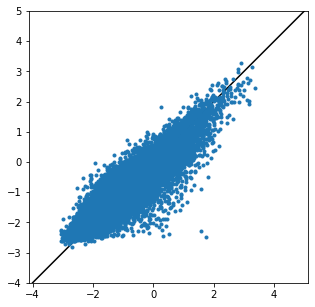

In [18]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("训练标准差STD=",np.std(pred_train_all-train_y.ravel()))
print("训练误差均值MEAN=",np.mean(pred_train_all-train_y.ravel()))
print("训练平均绝对误差MAE=",metrics.mean_absolute_error(pred_train_all, train_y.ravel()))
print("训练RMSE=",metrics.mean_squared_error(pred_train_all, train_y.ravel())**0.5)
print("训练MAPE=",np.mean(np.abs((train_y.ravel() - pred_train_all) / train_y.ravel())) * 100)
print("训练r2 score:", r2_score(train_y.ravel(), pred_train_all))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(-4, 5, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(train_y.ravel(),pred_train_all,'.')
plt.xlim(-4, 5)
plt.ylim(-4, 5)
plt.show()

In [18]:
print(pred_train_all.shape)
print(train_y.shape)

(34536,)
(34536, 1)


In [19]:
#########################保存训练结果####################################
pred_train_all=pred_train_all.reshape(pred_train_all.shape[0],1)

#y_score_tr=y_score_tr.reshape(y_score_tr.shape[0],1)
print(pred_train_all.shape)
print(train_y.shape)

tr_result=np.concatenate((train_y,pred_train_all),axis=1)

print(tr_result.shape)

data_tr = pd.DataFrame(tr_result) #将数组转换为dataframe结构
data_tr.columns=['True-LGIa','Pre-LGIa']
writer_tr = pd.ExcelWriter(r'Result\Ia\3s\Iatrain3.xls')   # 写入Excel文件

data_tr.to_excel(writer_tr,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_tr.save()
writer_tr.close()
#########################保存训练结果####################################

(34536, 1)
(34536, 1)
(34536, 2)


测试标准差STD= 0.3822617383279356
测试误差均值MEAN= -0.005515410723237856
测试平均绝对误差MAE= 0.2821100785692017
测试RMSE= 0.3823015254284778
测试MAPE= 98.03762564801687
测试r2 score: 0.8376056901532358


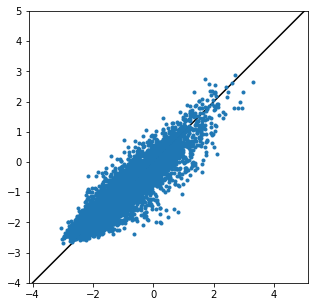

In [20]:
print("测试标准差STD=",np.std(pred_test_all-test_y.ravel()))
print("测试误差均值MEAN=",np.mean(pred_test_all-test_y.ravel()))
print("测试平均绝对误差MAE=",metrics.mean_absolute_error(pred_test_all, test_y.ravel()))
print("测试RMSE=",metrics.mean_squared_error(pred_test_all, test_y.ravel())**0.5)
print("测试MAPE=",np.mean(np.abs((test_y.ravel() - pred_test_all) / test_y.ravel())) * 100)
print("测试r2 score:", r2_score(test_y.ravel(), pred_test_all))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(-4, 5, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(test_y.ravel(),pred_test_all,'.')
plt.xlim(-4, 5)
plt.ylim(-4, 5)
plt.show()   

In [21]:
#########################保存测试结果####################################
pred_test_all=pred_test_all.reshape(pred_test_all.shape[0],1)

print(pred_test_all.shape)
print(test_y.shape)

te_result=np.concatenate((test_y,pred_test_all),axis=1)

print(te_result.shape)

data_te = pd.DataFrame(te_result) #将数组转换为dataframe结构
data_te.columns=['True-LGIa','Pre-LGIa']
writer_te = pd.ExcelWriter(r'Result\Ia\3s\Iatest3.xls')   # 写入Excel文件

data_te.to_excel(writer_te,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_te.save()
writer_te.close()
#########################保存测试结果####################################

(8635, 1)
(8635, 1)
(8635, 2)


In [22]:
#震例
import scipy.io as scio
import pandas as pd

#input
feature1z = r'independent datasets\ACC_EW.mat'
data1z = scio.loadmat(feature1z)
AAz=data1z['ACC_EW']
Az=AAz[:,0:300]

feature2z = r'independent datasets\ACC_NS.mat'
data2z = scio.loadmat(feature2z)
BBz=data2z['ACC_NS']
Bz=BBz[:,0:300]

feature3z = r'independent datasets\ACC_UD.mat'
data3z = scio.loadmat(feature3z)
CCz=data3z['ACC_UD']
Cz=CCz[:,0:300]

feature4z = r'independent datasets\DIS_EW.mat'
data4z = scio.loadmat(feature4z)
DDz=data4z['DIS_EW']
Dz=DDz[:,0:300]

feature5z = r'independent datasets\DIS_NS.mat'
data5z = scio.loadmat(feature5z)
EEz=data5z['DIS_NS']
Ez=EEz[:,0:300]

feature6z = r'independent datasets\DIS_UD.mat'
data6z = scio.loadmat(feature6z)
FFz=data6z['DIS_UD']
Fz=FFz[:,0:300]

feature7z = r'independent datasets\VEL_EW.mat'
data7z = scio.loadmat(feature7z)
GGz=data7z['VEL_EW']
Gz=GGz[:,0:300]

feature8z = r'independent datasets\VEL_NS.mat'
data8z = scio.loadmat(feature8z)
HHz=data8z['VEL_NS']
Hz=HHz[:,0:300]

feature9z = r'independent datasets\VEL_UD.mat'
data9z = scio.loadmat(feature9z)
IIz=data9z['VEL_UD']
Iz=IIz[:,0:300]


labelz = pd.read_csv(open(r'independent datasets\Lable-ZL.csv',encoding='UTF-8'))


In [23]:
raw_data1z=np.hstack((Az,Bz))
raw_data2z=np.hstack((raw_data1z,Cz))
raw_data3z=np.hstack((raw_data2z,Dz))
raw_data4z=np.hstack((raw_data3z,Ez))
raw_data5z=np.hstack((raw_data4z,Fz))
raw_data6z=np.hstack((raw_data5z,Gz))
raw_data7z=np.hstack((raw_data6z,Hz))
x_dataz=np.hstack((raw_data7z,Iz))

y_dataz=labelz.iloc[:,[2]].values  #知识嵌入
#y_data=label.iloc[:,[12]].values    #导入数据  iloc通过行号获取行数据
print(y_dataz[0])
print(y_dataz.shape)

[-1.46820275]
(11615, 1)


In [24]:
zhenli_y=y_dataz

In [25]:
zhenli_x=[]
for i in range(len(x_dataz)):
    zhenli_x.append(np.array(x_dataz[i].reshape(9,1,300)).T)

In [26]:
zhenli_x=np.array(zhenli_x)

In [27]:
zhenli_x = np.reshape(zhenli_x, (zhenli_x.shape[0], 300, 9))

In [28]:
pred_zhenli_all = model.predict(zhenli_x).ravel()  ##ravel() 转换成1列

震例标准差STD= 0.4896349100269022
震例误差均值MEAN= -0.09258165287288969
震例平均绝对误差MAE= 0.3580374234343863
震例RMSE= 0.4983108543527111
震例MAPE= 183.61269993251804
震例r2 score: 0.7741182533709232


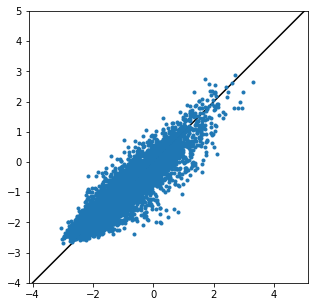

In [29]:
print("震例标准差STD=",np.std(pred_zhenli_all-zhenli_y.ravel()))
print("震例误差均值MEAN=",np.mean(pred_zhenli_all-zhenli_y.ravel()))
print("震例平均绝对误差MAE=",metrics.mean_absolute_error(pred_zhenli_all, zhenli_y.ravel()))
print("震例RMSE=",metrics.mean_squared_error(pred_zhenli_all, zhenli_y.ravel())**0.5)
print("震例MAPE=",np.mean(np.abs((zhenli_y.ravel() - pred_zhenli_all) / zhenli_y.ravel())) * 100)
print("震例r2 score:", r2_score(zhenli_y.ravel(), pred_zhenli_all))


plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(-4, 5, 0.01)
y3=x3
plt.plot(x3, y3, "black")
plt.plot(test_y.ravel(),pred_test_all,'.')
plt.xlim(-4, 5)
plt.ylim(-4, 5)
plt.show() 

In [30]:
#########################保存震例结果####################################
pred_zhenli_all=pred_zhenli_all.reshape(pred_zhenli_all.shape[0],1)

print(pred_zhenli_all.shape)
print(zhenli_y.shape)

tz_result=np.concatenate((zhenli_y,pred_zhenli_all),axis=1)

print(tz_result.shape)

data_tz = pd.DataFrame(tz_result) #将数组转换为dataframe结构
data_tz.columns=['True-LGIa','Pre-LGIa']
writer_tz = pd.ExcelWriter(r'Result\Ia\3s\Iazhenli3.xls')   # 写入Excel文件

data_tz.to_excel(writer_tz,float_format='%.5f',index=False)   ## ‘page_1’是写入excel的sheet名
writer_tz.save()
writer_tz.close()
#########################保存震例结果####################################

(11615, 1)
(11615, 1)
(11615, 2)
